In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/pankrzysiu/cifar10-python")
od.download("https://www.kaggle.com/datasets/valentynsichkar/cifar10-preprocessed")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalisha092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pankrzysiu/cifar10-python


100%|██████████| 325M/325M [00:20<00:00, 16.7MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/valentynsichkar/cifar10-preprocessed


100%|██████████| 1.14G/1.14G [01:13<00:00, 16.8MB/s]


In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import GlobalAveragePooling2D , Flatten , Dense  , Input , UpSampling2D

In [4]:
plt.rc('image', cmap='gray')
plt.rc('grid', linewidth=0)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

def plot_metrics(metric_name, ylim=2):
    plt.title(metric_name.capitalize())
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

def display_images(digits, predictions, labels, title):
    n = 10
    indexes = np.random.choice(len(predictions), size=n)
    n_digits = digits[indexes]
    n_predictions = predictions[indexes]
    n_predictions = n_predictions.reshape((n,))
    n_labels = labels[indexes]

    fig = plt.figure(figsize=(20, 4))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    for i in range(10):
        ax = fig.add_subplot(1, 10, i+1)
        class_index = n_predictions[i]

        plt.xlabel(classes[class_index])
        plt.xticks([])
        plt.yticks([])
        plt.imshow(n_digits[i])

In [5]:
(train_images , train_labels ), (valid_images , valid_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 18s 0us/step


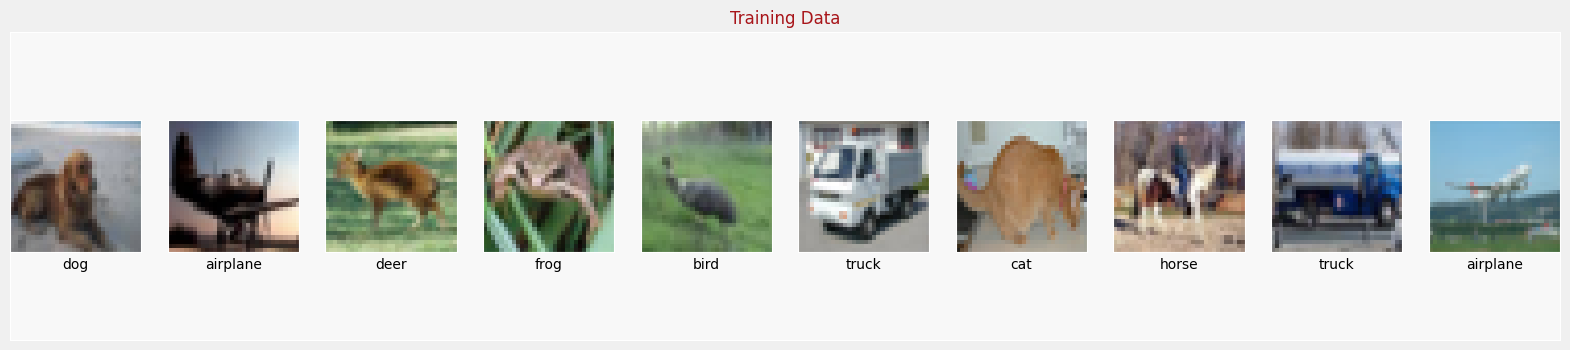

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
display_images(train_images, train_labels, train_labels, "Training Data" )

In [7]:
def preprocess_image_input(input_images):
    input_images = input_images.astype('float32')
    output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
    return output_ims

In [8]:
train_X = preprocess_image_input(train_images)
valid_X = preprocess_image_input(valid_images)

In [9]:
def feature_extractor(inputs):
    feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape = (224 ,224, 3) ,
                                                             weights = "imagenet" ,
                                                             include_top = False)(inputs)
    return feature_extractor

In [10]:
def classifier(inputs):
    x = GlobalAveragePooling2D()(inputs)
    x = Flatten()(x)
    x = Dense(1024 , activation="relu")(x)
    x = Dense(512 , activation ="relu")(x)
    x = Dense(10  , activation="softmax" , name = "classification")(x)
    return x

In [11]:
def get_model():
    inputs = Input(shape = (32 , 32 , 3))
    resize = UpSampling2D(size = (7,7))(inputs) # 7*32 = 224
    resnet_feature_extractor = feature_extractor(resize)
    classifer_output = classifier(resnet_feature_extractor)
    model = tf.keras.Model(inputs = inputs ,
                          outputs = classifer_output)
    return model
model = get_model()
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                              

In [12]:
model.compile(optimizer ="adam" ,
             loss ="sparse_categorical_crossentropy" ,
             metrics = ["accuracy"])

In [13]:
history = model.fit(train_X , train_labels , epochs = 10 ,
                   validation_data=(valid_X , valid_labels) , batch_size = 64)

Epoch 1/10
782/782 [==============================] - 363s 412ms/step - loss: 0.8217 - accuracy: 0.7179 - val_loss: 1.2356 - val_accuracy: 0.6563
Epoch 2/10
782/782 [==============================] - 316s 404ms/step - loss: 0.4485 - accuracy: 0.8459 - val_loss: 0.5621 - val_accuracy: 0.8171
Epoch 3/10
782/782 [==============================] - 316s 404ms/step - loss: 0.3249 - accuracy: 0.8882 - val_loss: 0.7143 - val_accuracy: 0.7800
Epoch 4/10
782/782 [==============================] - 316s 404ms/step - loss: 0.2371 - accuracy: 0.9168 - val_loss: 0.4544 - val_accuracy: 0.8516
Epoch 5/10
782/782 [==============================] - 316s 404ms/step - loss: 0.1838 - accuracy: 0.9372 - val_loss: 0.4650 - val_accuracy: 0.8574
Epoch 6/10
782/782 [==============================] - 316s 404ms/step - loss: 0.1382 - accuracy: 0.9527 - val_loss: 0.5010 - val_accuracy: 0.8601
Epoch 7/10
782/782 [==============================] - 316s 404ms/step - loss: 0.1154 - accuracy: 0.9598 - val_loss: 0.4955 -

In [14]:
loss, accuracy = model.evaluate(valid_X, valid_labels, batch_size=64)

157/157 [==============================] - 16s 99ms/step - loss: 0.4481 - accuracy: 0.8817


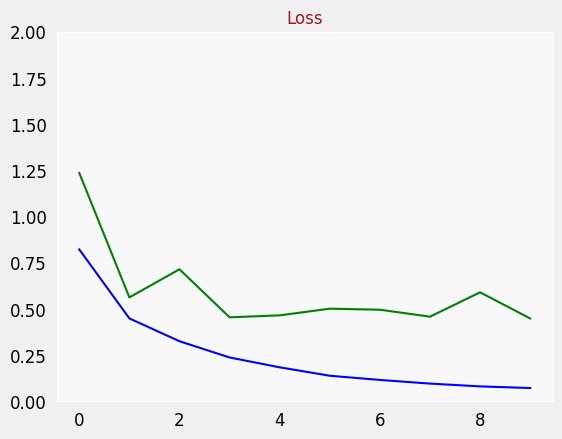

In [15]:
plot_metrics("loss")

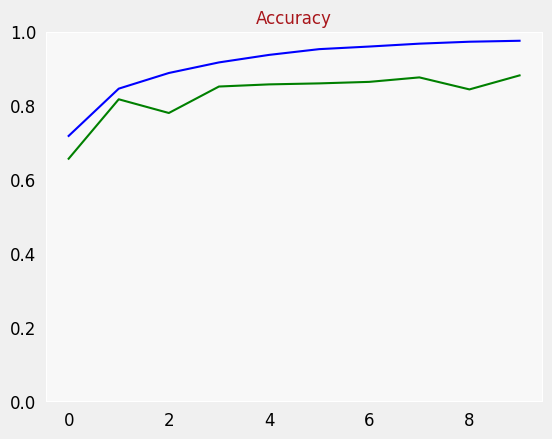

In [16]:
plot_metrics("accuracy" , ylim = 1)

157/157 [==============================] - 16s 97ms/step


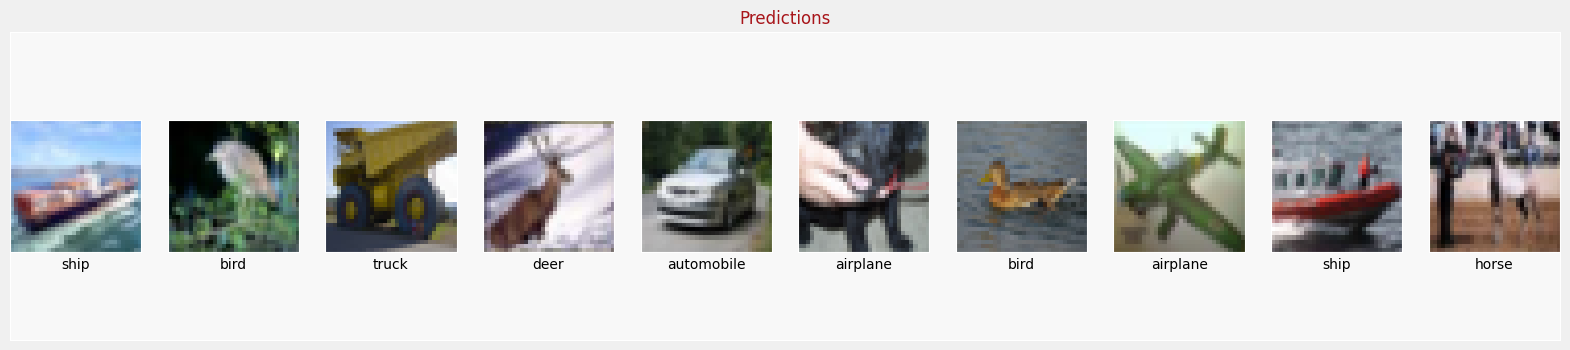

In [17]:
preds = model.predict(valid_X , batch_size= 64)
probabilities =np.argmax(preds ,axis = 1)
display_images(valid_images , probabilities , valid_labels ,"Predictions")